The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


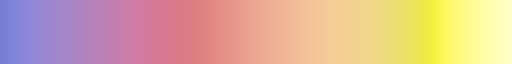

In [105]:
# autoreload
%load_ext autoreload
%autoreload 2

# Import cieran
from cieran import Cieran

# Test the Cieran class
waypoints = [[84, 11, 31], [57, 15, -46]]
obstacles = [[78, 9, 1], [95, -20, 5], [92, -10, 78]]

cieran = Cieran(waypoints, obstacles, 30, truncate_front=0.3, truncate_back=0.1)

# Plot the path
cieran.cmap

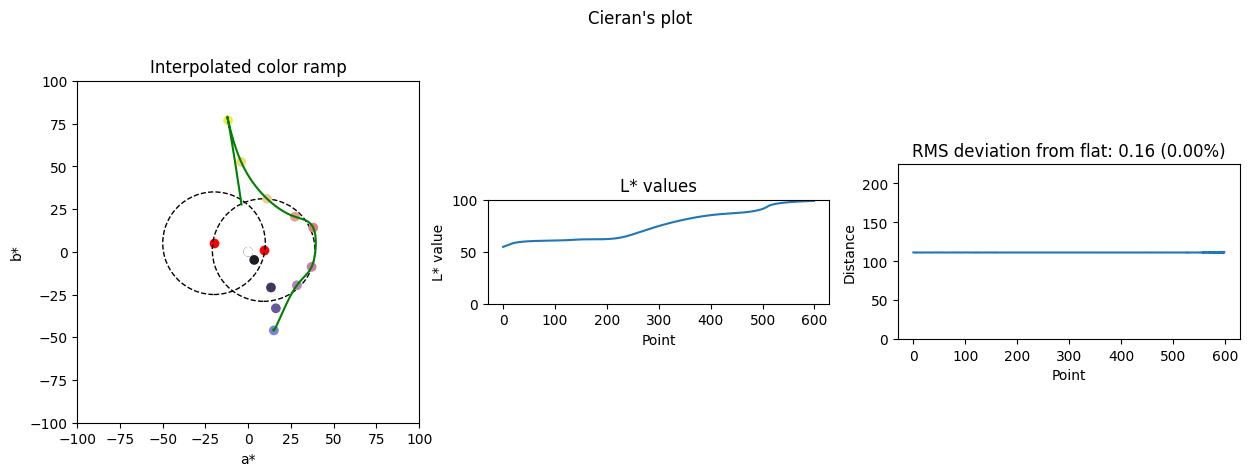

In [106]:
cieran.plot_all()

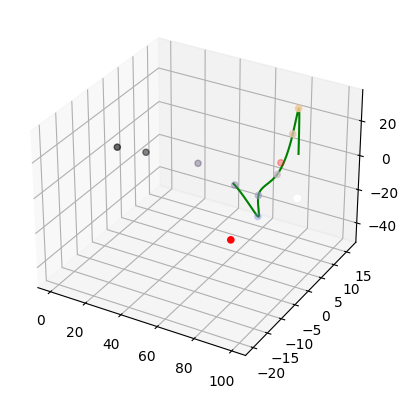

In [75]:
cieran.plot()

In [59]:
import altair as alt
from vega_datasets import data

source = data.windvectors()

alt.Chart(source).mark_point(shape="wedge", filled=True).encode(
    latitude="latitude",
    longitude="longitude",
    color=alt.Color(
        "dir", scale=alt.Scale(domain=[0, 360], range=cieran.cmap.colors)
    ),
    angle=alt.Angle("dir", scale=alt.Scale(domain=[0, 360], range=[180, 540])),
    size=alt.Size("speed", scale=alt.Scale(rangeMax=500)),
).project("equalEarth")


/Users/beach/opt/miniconda3/envs/ramp-it/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

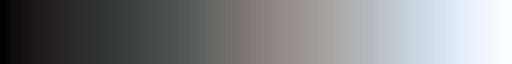

In [17]:
cieran.cmap

In [20]:
import numpy as np
np.diff(np.array(cieran.ramper.path)[:, 0]) * len(cieran.ramper.path)

array([94.57084537, 94.77070452, 94.95682555, 95.12699011, 95.281582  ,
       95.42098865, 95.54559983, 95.65580644, 95.74397454, 95.81556279,
       95.88356624, 95.93885818, 95.98181795, 96.01282048, 96.03223573,
       96.04042819, 96.03775643, 96.02457275, 95.99074345, 95.94752556,
       95.90465848, 95.85272671, 95.79204364, 95.7229152 , 95.64563986,
       95.5605086 , 95.46780491, 95.36780486, 95.26077717, 95.14698326,
       95.02667738, 94.90010669, 94.76751146, 94.62912514, 94.48517454,
       94.33587998, 94.1766602 , 94.01555043, 93.85261237, 93.68520163,
       93.51350644, 93.33770966, 93.15798898, 92.97451706, 92.78746177,
       92.59698627, 92.40324923, 92.20640498, 92.00531265, 91.79405499,
       91.58715597, 91.37769661, 91.16581313, 90.95163825, 90.73530129,
       90.5169283 , 90.29664218, 90.0745628 , 89.8508071 , 89.62548921,
       89.39872051, 89.17060972, 88.94126304, 88.71078414, 88.47927433,
       88.24683252, 87.99242032, 87.73943671, 87.50275273, 87.26

In [17]:
cieran.ramper.path

[[25.945875706839455, 13.827627425201772, -21.925675832169375],
 [26.103493782452652, 13.8874889696426, -22.048081866894137],
 [26.261444956645402, 13.946289386690596, -22.169421183245852],
 [26.419706332558157, 14.004033553299497, -22.289716897936966],
 [26.578251316074393, 14.060725488679921, -22.408989670147484],
 [26.73705395274736, 14.116369971372253, -22.5272610034974],
 [26.896088933838346, 14.170972496391743, -22.644553169913767],
 [27.055331600216892, 14.224539232997774, -22.760889135754265],
 [27.21475794427884, 14.277076983224287, -22.87629249034473],
 [27.374331235186954, 14.32858886828677, -22.990777823044425],
 [27.534023839830326, 14.379081556849473, -23.1043665165347],
 [27.693829783566997, 14.428568789392298, -23.217095231785432],
 [27.853727880534585, 14.477059604984262, -23.32898956042528],
 [28.013697577115266, 14.524563474869069, -23.440075388703356],
 [28.173718944581786, 14.571090267796324, -23.550378842773323],
 [28.333772670802837, 14.616650216658583, -23.65992